In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Rocket:
    def __init__(self, mass, initial_vel, fuel_mass, fuel_vel, shots):
        self.mass = mass + fuel_mass
        self.initial_mass = mass + fuel_mass
        self.vel = initial_vel
        self.fuel = self.Fuel(fuel_mass, fuel_vel, shots)
    
    def update_vel(self):
        pellet_mass, fuel_vel = self.fuel.get_data()
        self.vel += fuel_vel * np.log(self.mass/(self.mass-pellet_mass))
        self.mass -= pellet_mass
        return self.vel
    
    def get_vel(self):
        return self.vel
    
    class Fuel:
        def __init__(self, fuel_mass, fuel_vel, num_shots):
            self.num_shots = num_shots
            self.fuel_vel = fuel_vel
            self.pellet_mass = fuel_mass / num_shots
        
        def get_data(self):
            return self.pellet_mass, self.fuel_vel

In [3]:
##### Variables #####
time = 200
shots = [2, 5, 50, 1000]
fuel_mass = 200
rocket_mass = 100
rocket_vel = 0
fuel_vel = 100

In [4]:
senarios = []
for shot in shots:
    senarios.append(Rocket(rocket_mass, rocket_vel, fuel_mass, fuel_vel, shot))

times = []
vels = []
for i in range(len(shots)):
    times.append([0] + [(time / shots[i]) * (j + 1) for j in range(shots[i])])
    vels.append([senarios[i].get_vel()] + [0 for j in range(shots[i])])

In [5]:
for i in range(len(shots)):
    rocket = senarios[i]
    for j in range(1, shots[i] + 1):
        vels[i][j] = rocket.update_vel()

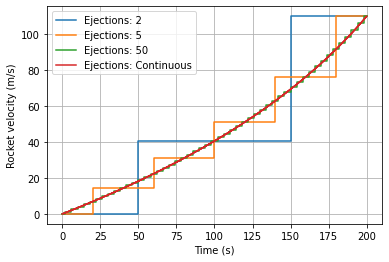

In [8]:
for i in range(len(shots)):
    label = f"Ejections: {shots[i]}" if i != 3 else f"Ejections: Continuous"
    plt.step(times[i], vels[i], where="mid", label=label)
plt.legend()
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Rocket velocity (m/s)")
plt.savefig('plot.png', dpi=1000)